<a href="https://colab.research.google.com/github/Mr-Himanshu123/EDA_Project/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**Himanshu Rathod
##### **Team Member 2 -**Shubham Kumar
##### **Team Member 3 -**Chaitanya
##### **Team Member 4 -**Sabitendu
##### **Team Member 5 -**Monika

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [200]:
# Import Libraries
import pandas as pd    #Data Manipulation and Aggregation
import numpy as np     #Computationally efficient Operation
import matplotlib.pyplot as plt   #Visualisation of Graph
%matplotlib inline
import seaborn as sns  #Ploting the Graph
import missingno as msno  #Missing Value Visualisation
import warnings
warnings.filterwarnings('ignore')  #Controls the Display Warning message

### Dataset Loading
**(A) Playstore Data Analysis**

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
# Load Dataset
playstore_df=pd.read_csv("/content/drive/MyDrive/EDA Project-Play_Store_Review/Play Store Data.csv")

### Dataset First View

In [131]:
# Dataset First Look
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [132]:
# Dataset Rows & Columns count
rows_count=len(playstore_df.index)
columns_count=len(playstore_df.columns)
print(f'No. of rows-{rows_count}')
print(f'No.of columns-{columns_count}')

# Or we can find number of Rows and Columns By simple Shape Function
playstore_df.shape

No. of rows-10841
No.of columns-13


(10841, 13)

### Dataset Information

In [133]:
# Dataset Info
playstore_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB




#### Duplicate Values

In [134]:
# Dataset Duplicate Value Count
duplicated_value_count=playstore_df.duplicated(subset=['App']).sum()
duplicated_value_count

1181

#### Missing Values/Null Values

In [135]:
 # Missing Values/Null Values Count
missing_values=playstore_df.isnull().sum()
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

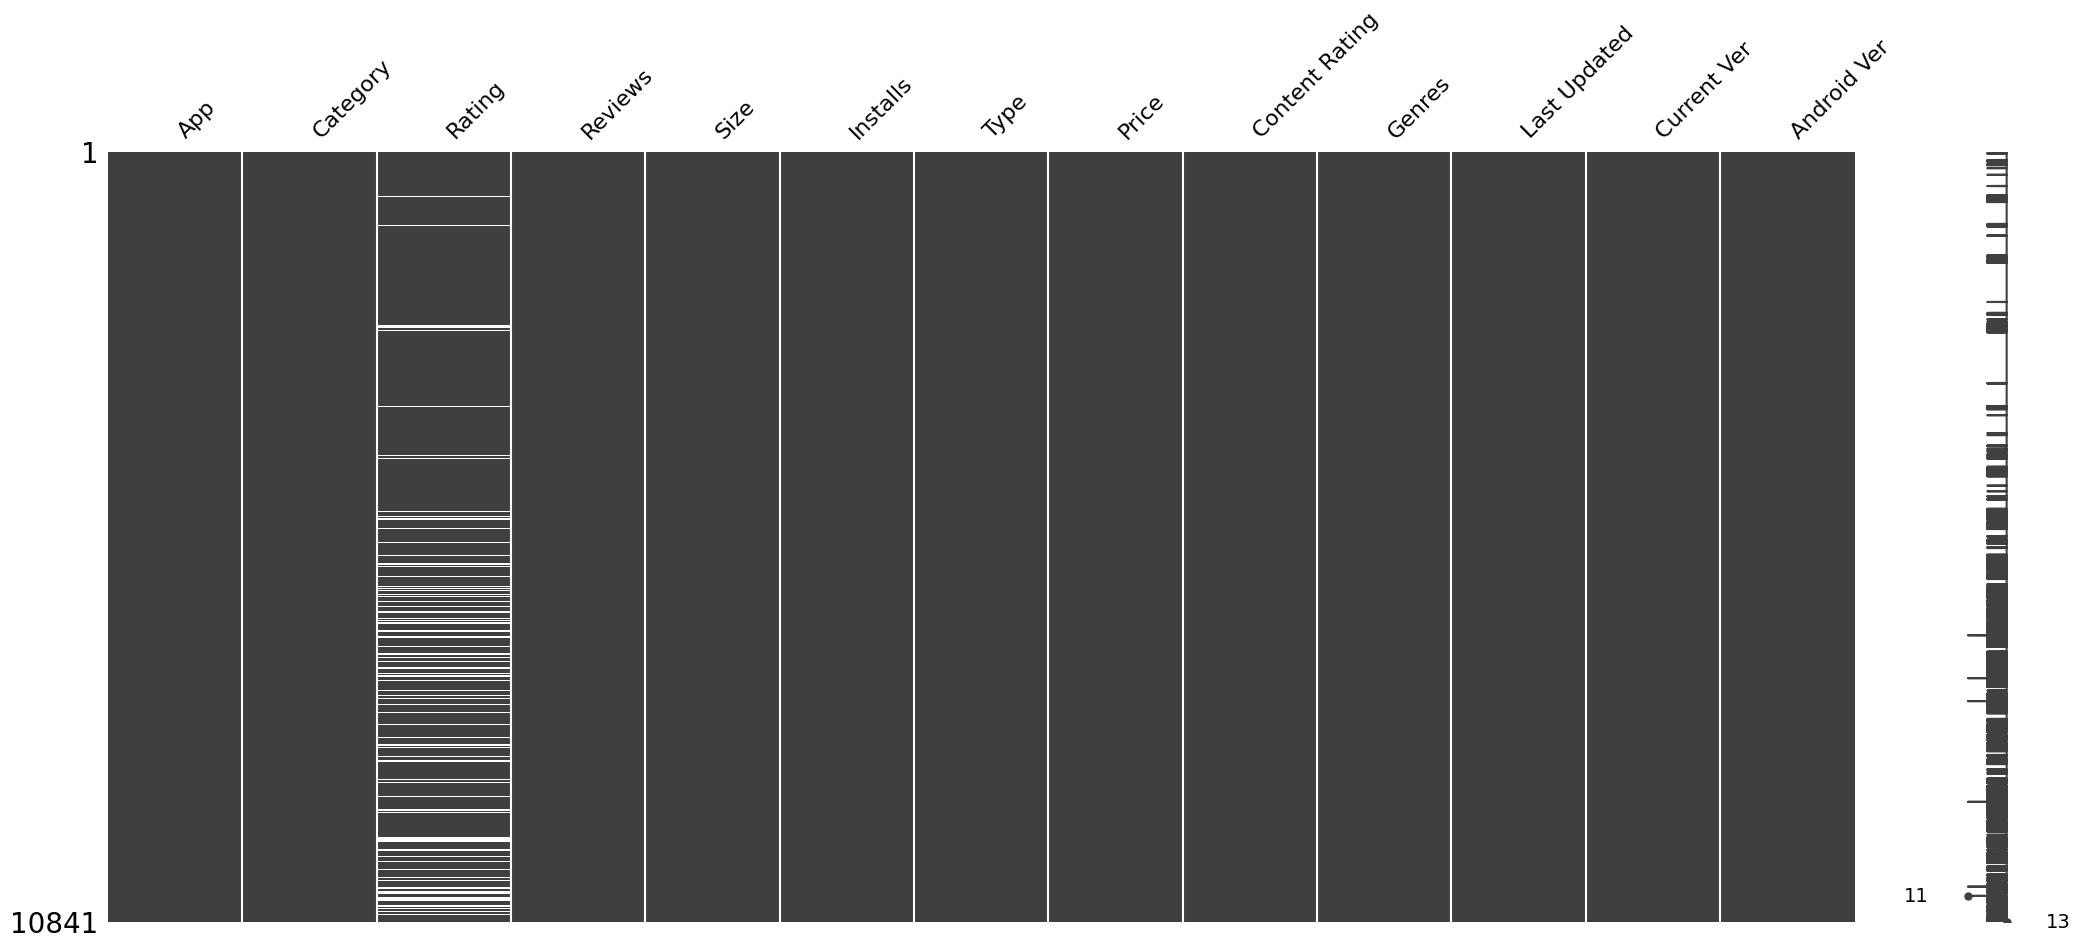

In [136]:
# Visualizing the missing values
msno.matrix(playstore_df)

Above Visualization of matrix chart, 'Rating' column has more missing values and they are distributed all over the place and other columns like 'Current Ver' And 'Android Ver' are near the end of the column which are not visualize in matrix chart.
 

### What did you know about your dataset?

**First, let's use inspections to define what information a column contains.**

The Playstore dataset has 10841 rows and 13 columns.

(i) **App -** Displays the name of Application.    
(ii)**Category -** Give the app field category-ART AND DESIGN, EDUCATION, etc.  
(iii)**Rating -** Provides the total average user rating as per the application.   
(iv)**Reviews -** Displays the total number of users who have rated the apllication.     
(v)**Size -** Provides information about the size of application occupies on the mobile phone.      
(vi)**Installs -** Reports the total number of application installs/downloads.  
(vii)**Type -** Indicates whether the app usage is free or paid.  
(viii)**Price -** Specifies the price you pay to install the app.  
(ix)**Content Rating -** Shows whether the app is suitable for all ages.  
(x)**Genre -** Provides information about various other categories that the application can belong to.   
(xi)**Last Updated -** Indicates when the application was updated.  
(xii)**Current Version -** Tell us about the current version.  
(xiii)**Android Version -** Indicates the Android version that the application can support on that platform. 

## ***2. Understanding Your Variables***

In [137]:
# Dataset Columns
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [138]:
# Dataset Describe
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description 

Answer Here-Only the 'Rating' column is numeric , the others are categorical data. Here you can see that the maximum value in the rating column is 19, which is inappropriate.It is Outlier present in dataset which affects the data most.


####Outlier Check And Drop

<Axes: >

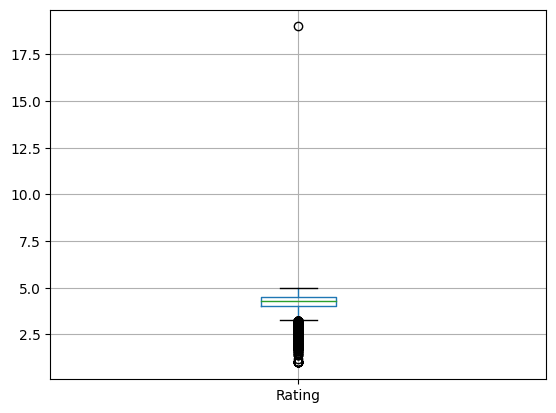

In [139]:
#Checking Dataset outlier With the Help of Boxplot in Rating Column and removing it using Drop Method 
playstore_df.boxplot()

In [140]:
# checking and Romoving Outlier Which is Greater than 5 Rating 
playstore_df[playstore_df.Rating >5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [141]:
#Permanently Dropping Outerlier form playstore_df
playstore_df.drop([10472],inplace=True)

In [142]:
playstore_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


<Axes: >

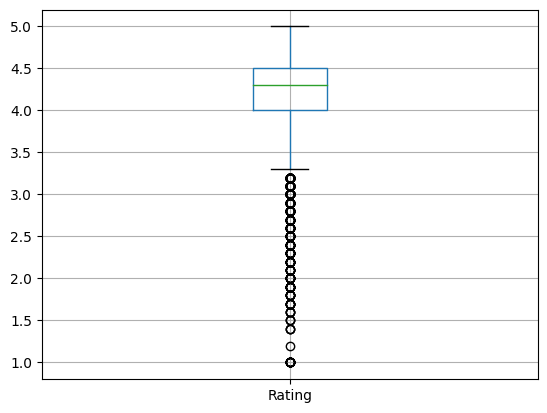

In [143]:
#Only One Row Drop From the Data set as Outlier which has rating greater than 5 and Box plot shows accurate Visualization 
playstore_df.boxplot()

### Check Unique Values for each variable.

In [144]:
# Check Unique Values for each variable.
playstore_df.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [145]:
playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## 3. ***Data Wrangling***

### 3.1 Dropping Duplicate Values From Dataset

In [146]:
'''Write your code to make your dataset analysis ready.
-Removing Duplicate Values From Dataset'''
playstore_df=playstore_df.drop_duplicates(subset=["App"])
playstore_df.shape

(9659, 13)

### 3.2 Handling Missing Values

In [147]:
#Missing value description with respect to every Variables
Missing_values=playstore_df.isna().head().sum()
missing_values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [148]:
#Checking Null values for 'Rating' column in the given dataset
playstore_df[playstore_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [149]:
#Checking null values of 'Type' Column
playstore_df[playstore_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [150]:
#Checking null values of 'Content Rating' column
playstore_df[playstore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [151]:
#Checking null values valuesof 'Current Ver' column
playstore_df[playstore_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [152]:
#Checking null values for the 'Android Ver' column
playstore_df[playstore_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


####3.2.1 The 'Rating' is Numerical column and contains many null values. Therefore, this data cannot be drop because important data may lost. So, we have replace missing value according to the data observation.

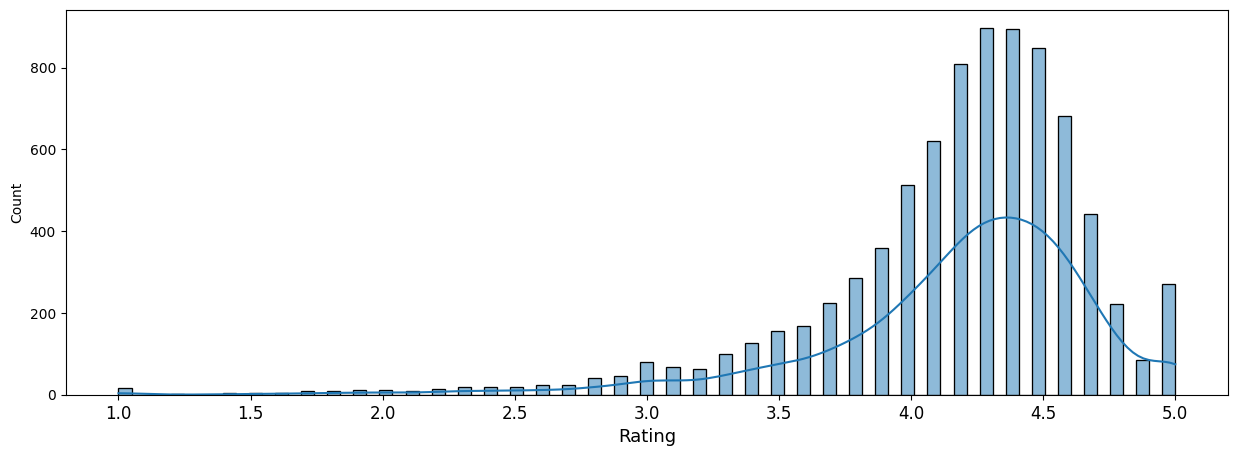

In [153]:
#Understanding 'Rating' column with respect to distplot Distribution
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(playstore_df['Rating'],kde=True)
ax.set_xlabel('Rating', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

Above 'Rating' Distribution shows negatively skewed, Therefore replacing it with mean may be inappropriate due to presence of Outliers. So, replacing the missing vaues with respect to median value.

In [154]:
# Manipulating 'Rating' column null values to median values 
playstore_df=playstore_df.fillna(playstore_df.median()) 

<ipython-input-154-acf682c8c3d3>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  playstore_df=playstore_df.fillna(playstore_df.median())


#### 3.2.2 Also replacing Missing variable with mode values. 

In [155]:
#Also Updating the Null value of 'Android Ver', 'Current Ver','Content Rating' and 'Type' Column with mode values 
playstore_df['Android Ver'].fillna(playstore_df['Android Ver'].mode()[0],inplace=True)
playstore_df['Current Ver'].fillna(playstore_df['Current Ver'].mode()[0],inplace=True)
playstore_df['Type'].fillna(playstore_df['Type'].mode()[0],inplace=True)
playstore_df['Content Rating'].fillna(playstore_df['Content Rating'].mode()[0],inplace=True)

In [156]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 3.3 Unique Value and Data Conversion

In [157]:
#Converting Reviews Column to Numeric 
playstore_df=playstore_df.astype({'Reviews':'int'})

In [158]:
#Checking unique values of 'Price' column 
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [159]:
#Converting Price column to float with removal of '$' sign in it
playstore_df['Price']=playstore_df['Price'].apply((lambda x: str(x).replace('$','') if '$' in str(x) else str(x)))
playstore_df['Price']=playstore_df['Price'].apply(lambda x: float(x))

In [160]:
#Checking unique values of 'Installs' column 
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [161]:
#Now converting install to float with removal of ',' And '+' sign in columns
playstore_df['Installs']=playstore_df['Installs'].apply((lambda x: str(x).replace('+','') if '+' in str(x) else str(x)))
playstore_df['Installs']=playstore_df['Installs'].apply((lambda x: str(x).replace(',','') if ',' in str(x) else str(x)))
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: float(x))

In [162]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [163]:
#Checking unique values of 'Size' column 
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [164]:
#Manupulating 'Size' into float column with removal of 'k','M','+' from Dataset
playstore_df['Size']=playstore_df.Size.replace("Varies with device",np.nan)
playstore_df['Size']=playstore_df.Size.str.replace("M","")                   
playstore_df['Size']=playstore_df.Size.str.replace("k","")
playstore_df['Size']=playstore_df['Size'].astype(float)
playstore_df['Size'].dtype

dtype('float64')

In [165]:
#Also coverting 'Last Updated' Column to DateTime Formate:-
playstore_df['Last Updated']=pd.to_datetime(playstore_df['Last Updated'])
playstore_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9659, dtype: datetime64[ns]

In [166]:
playstore_df.sample(10)    #Random Ten Values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3745,Microsoft News,NEWS_AND_MAGAZINES,4.2,31504,31.0,1000000.0,Free,0.0,Everyone 10+,News & Magazines,2018-07-30,18.201.01,5.0 and up
6698,Mu Mobile BR,BUSINESS,4.5,43,92.0,100.0,Free,0.0,Everyone,Business,2018-07-20,3.0.0 By Luccas,2.3 and up
2880,Mega Photo,PHOTOGRAPHY,4.2,44941,16.0,1000000.0,Free,0.0,Everyone,Photography,2016-10-19,1.6.2,3.0 and up
6944,Bixby Button Remapper - bxActions,TOOLS,4.3,13064,4.6,1000000.0,Free,0.0,Everyone,Tools,2018-05-23,4.72,7.0 and up
9067,Dx Ludo,FAMILY,3.6,215,2.6,50000.0,Free,0.0,Everyone,Puzzle,2011-04-18,1.0,2.1 and up
3379,Microsoft Launcher,PERSONALIZATION,4.6,649568,26.0,10000000.0,Free,0.0,Everyone,Personalization,2018-08-01,4.12.0.44682,4.2 and up
4942,Free Adblocker Browser - Adblock & Popup Blocker,COMMUNICATION,4.4,152470,NaN,10000000.0,Free,0.0,Everyone,Communication,2018-07-19,Varies with device,Varies with device
10048,Money Manager Ex for Android,FINANCE,4.2,2695,NaN,100000.0,Free,0.0,Everyone,Finance,2018-02-26,Varies with device,Varies with device
3352,Nova Launcher,PERSONALIZATION,4.6,1121805,NaN,50000000.0,Free,0.0,Everyone,Personalization,2018-05-14,Varies with device,Varies with device
5532,Snaappy – 3D fun AR core communication platform,SOCIAL,4.6,16801,NaN,1000000.0,Free,0.0,Everyone,Social,2018-07-16,1.5.341,4.0.3 and up


In [167]:
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,37.133693,7.777507e+06,1.099299
std,0.496397,1.831320e+06,102.415039,5.375828e+07,16.852152
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,14.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,32.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


**(B) User Review Data Analysis**

In [168]:
#Load Dataset
userReview_df=pd.read_csv("/content/drive/MyDrive/EDA Project-Play_Store_Review/User Reviews.csv")

In [169]:
#Dataset First Look
userReview_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [170]:
userReview_df.shape

(64295, 5)

In [171]:
#Dataset Rows and Columns count
userReview_rowCount=len(userReview_df.index)
userReview_columnCount=len(userReview_df.columns)
print(f'No. of rows-{userReview_rowCount}')
print(f'No. of columns-{userReview_columnCount}')

No. of rows-64295
No. of columns-5


In [172]:
#Dataset Info
userReview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [173]:
#Describing userReview Data to check Attributes
userReview_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


###From the about Description we can see that there two numerical columns such as 'Sentiment_Polarity' and 'Sentiment_Subjectivity' and Three are Catagorical in nature define as 'App', 'Translated_Review', and 'Sentiment'.Also contains lots of Missing values in it.

In [174]:
userReview_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### What did you know about your dataset?

The userReview_df has 64295 rows and 5 columns.The five columns are marked as follows.   
**(i) App -** App name with short Description.   
**(ii) Translated_Review -** Contains English tranlation of ratings given by app users.         
**(iii) Sentiment -** It conveys the emotions of the user that is 'Positive', 'Negative', 'Nuetral'  
**(iv) Setiment_Polarity -**  Indicates the polarity of the review.The Range is [-1,1], where 1 means 'positive sentiment' and -1 means 'nagative statement'.    
**(i) Sentiment_Subjectivity -** This values indicates how close the reviewer's opinion is to the public opinion.The Range is [0,1]. Higher the subjectivily, the closer the reviewer's opinion is to the general public, and the lower the subjectively, the more factually informed the review.


In [176]:
#Checking null values with respect to 'Translated_Review' 
userReview_df[userReview_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


<Axes: >

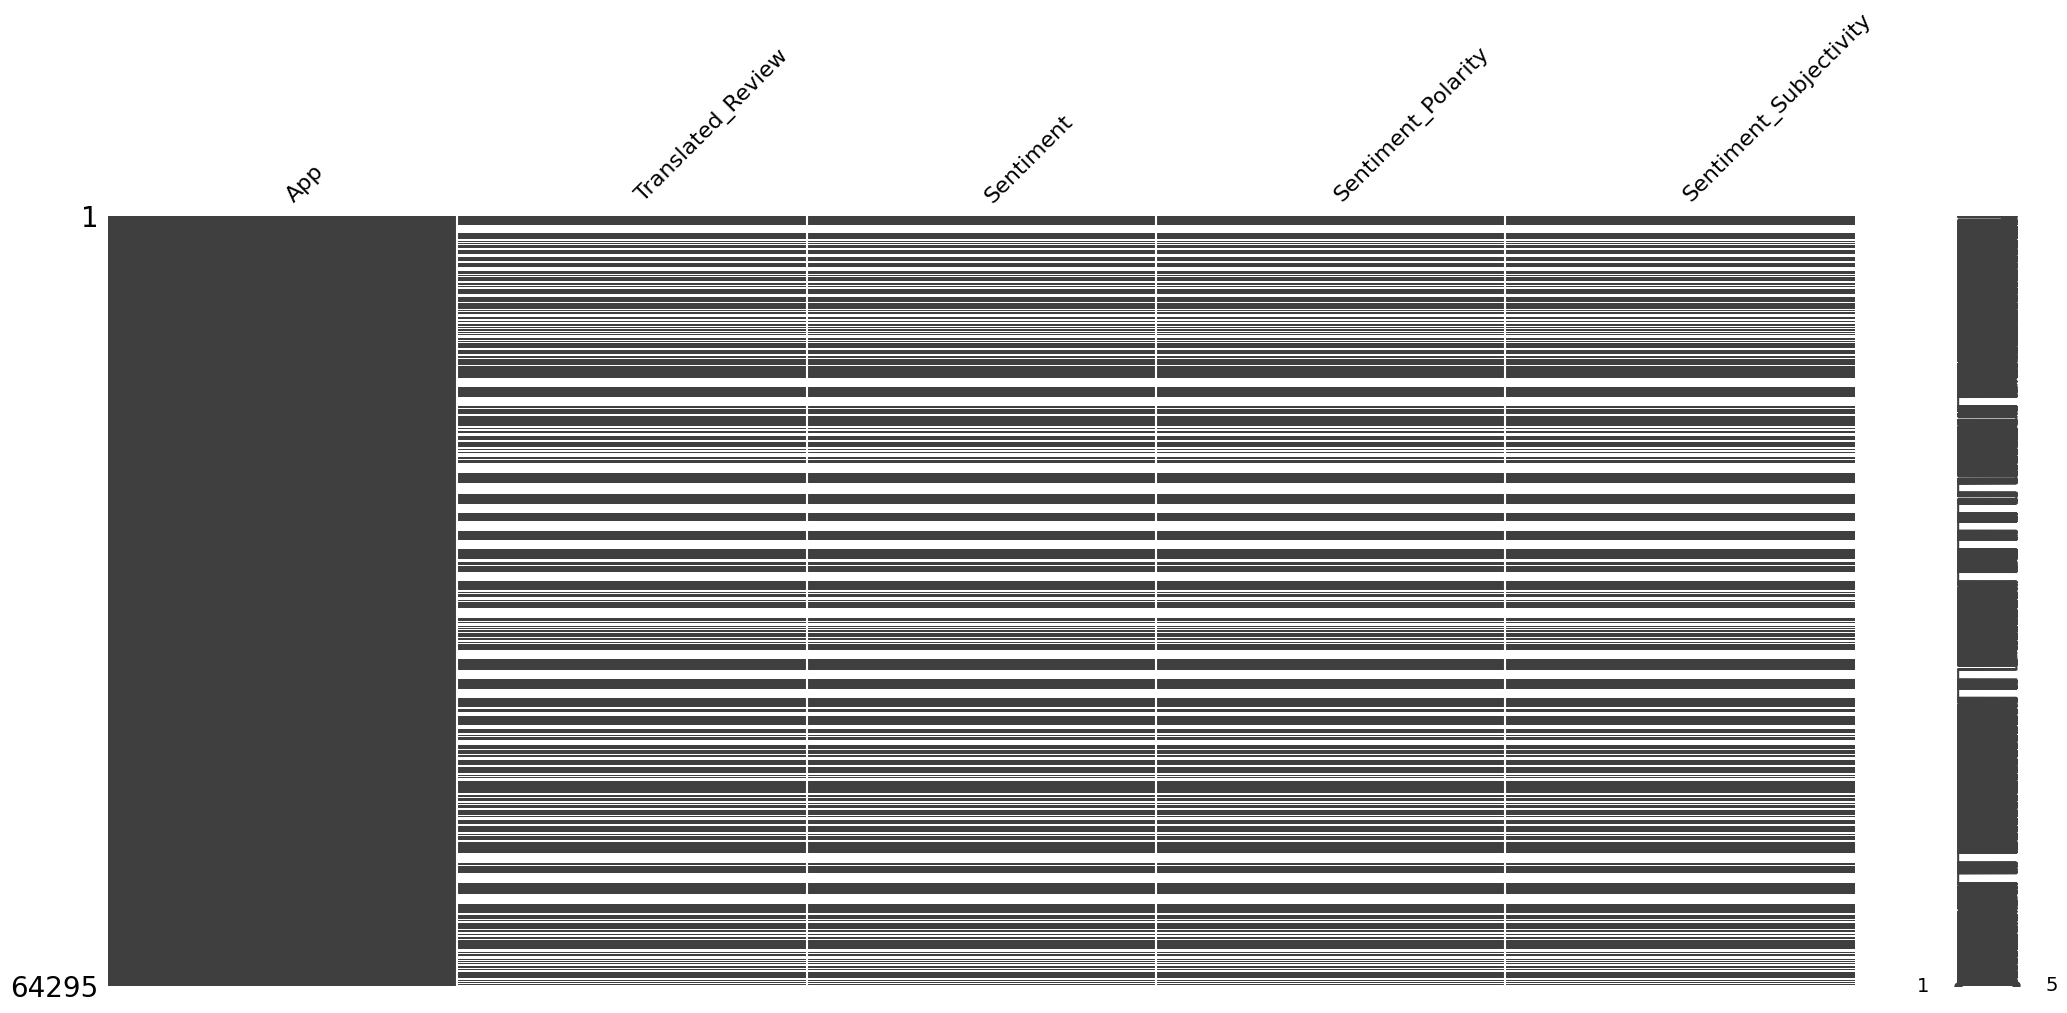

In [177]:
#Visualizing the missing values
msno.matrix(userReview_df)

In [175]:
#Missing Values/Null Values Count
userReview_missing_values=userReview_df.isnull().sum()
userReview_missing_values

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**Above Missing value Distribution :-**We can see that except 'App' column all the columns contains missing values and they can't be replace. So, we have to drop all that null value data.      
* **'Translated_Review'** has 26868 null values contains 41.79% of the data.
* **'Sentiment'** has 26863 null values contains 41.78% of the data.
* **'Sentiment_Polarity'** has 26863 null values contains 41.78% of the data.
* **'Sentiment_Subjectivity'** has 26863 null values contains 41.78% of the data.

In [178]:
#Dropping Null values that are contains in above data.
userReview_df=userReview_df.dropna()
userReview_df.shape

(37427, 5)

In [179]:
#Missing Value Check
userReview_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

**(C) Merging of Two DataFrame**

In [206]:
#create a new dataset by grouping App And Sentiment.
gb_df=userReview_df.groupby(['App','Sentiment']).size().unstack(level=1)
gb_df.reset_index(inplace=True)
gb_names=['App','Negetive_Sentiment','Neutral_Sentiment','Positive_Sentiment']
gb_df.columns=gb_names
gb_df.head()


,App,Negetive_Sentiment,Neutral_Sentiment,Positive_Sentiment
0,10 Best Foods for You,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,9.0,23.0
3,1800 Contacts - Lens Store,6.0,10.0,64.0
4,1LINE – One Line with One Touch,8.0,3.0,27.0


In [210]:
#Add mean sentiment polarity and mean sentiment to the dataframe 
app_list=list(userReview_df['App'].unique())
sen_pol=[]
sen_sub=[]
for i in app_list:
  app_df=userReview_df[userReview_df['App']==i]
  sen_pol.append(app_df['Sentiment_Polarity'].mean())
  sen_sub.append(app_df['Sentiment_Subjectivity'].mean())
gb_df['Mean_Sentiment_polarity']=sen_pol
gb_df['Mean_Sentiment_Subjectivity']=sen_sub
gb_df.head()

,App,Negetive_Sentiment,Neutral_Sentiment,Positive_Sentiment,Mean_Sentiment_polarity,Mean_Sentiment_Subjectivity
0,10 Best Foods for You,10.0,22.0,162.0,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0,0.392405,0.545516
2,11st,7.0,9.0,23.0,0.185943,0.455340
3,1800 Contacts - Lens Store,6.0,10.0,64.0,0.318145,0.591098
4,1LINE – One Line with One Touch,8.0,3.0,27.0,0.196290,0.557315


In [211]:
#Find null values in new gb_df 
gb_df.isnull().sum()

App                              0
Negetive_Sentiment              83
Neutral_Sentiment              124
Positive_Sentiment              12
Mean_Sentiment_polarity          0
Mean_Sentiment_Subjectivity      0
dtype: int64

In [212]:
#Replacing null values with Zero
gb_df.fillna(0,inplace=True)

In [214]:
#Merging Two Dataset with respect to inner joint
merged_df=pd.merge(playstore_df,gb_df, on='App', how='inner')
merged_df.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Negetive_Sentiment,Neutral_Sentiment,Positive_Sentiment,Mean_Sentiment_polarity,Mean_Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,4.0,26.0,0.152652,0.641540
1,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,10.0,16.0,64.0,0.268483,0.523447
2,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,0.0,0.0,4.0,0.412649,0.679226
3,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12.0,100000.0,Free,0.0,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,5.0,10.0,23.0,0.283509,0.479298
4,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000.0,Free,0.0,Everyone,Art & Design;Creativity,2017-10-11,1.0.8,4.0.3 and up,8.0,1.0,29.0,0.171836,0.572762
5,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1,100000.0,Free,0.0,Everyone,Art & Design,2018-03-21,1.03,4.0.3 and up,4.0,10.0,21.0,0.291857,0.546365


In [215]:
#Shape of merged_df
merged_df.shape

(816, 18)

### What all manipulations have you done and insights you found?
* Dealing with null values of Rating column with replacing median value in it.
* Also replaced the null values of type, Android ver and Current ver with mode value.
* Review,Install,Price and Size Dtype changed to Numerical values.

* Changed the data type of the Last Updated column into Date-Time Formate.
* Dropped all the null values from userRaview DataFrame.
* UserReview has many duplicate rows. therefore, before joining two dataframe userReview data has been filtered out according to app column and formating other column to suit the dataframe.
* Make Data ready to perform further analysis and visualization. Which gives you better understanding and Data ready as per requirement

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**4.1 Univariant Analysis**

#### Chart - 1

In [181]:
# Chart - 1 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [182]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [183]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [184]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [185]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [186]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [187]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [188]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [189]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [190]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [191]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [192]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [193]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [194]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [195]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***